In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from google.colab import files

In [5]:
soil_data = pd.read_csv('/content/drive/MyDrive/MlProject/Ml_Datasets/soil.csv',header=0)
rain_data = pd.read_csv('/content/drive/MyDrive/MlProject/Ml_Datasets/rainfall.csv',header=0)
fertilizer_data = pd.read_csv('/content/drive/MyDrive/MlProject/Ml_Datasets/fertilizers.csv',header=0)
wheat_data = pd.read_csv('/content/drive/MyDrive/MlProject/Ml_Datasets/wheat.csv',header=0)

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
soil_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Dist Code   313 non-null    int64 
 1   Year        313 non-null    object
 2   State Code  313 non-null    int64 
 3   State Name  313 non-null    object
 4   Dist Name   313 non-null    object
 5   soil_per    310 non-null    object
dtypes: int64(2), object(4)
memory usage: 14.8+ KB


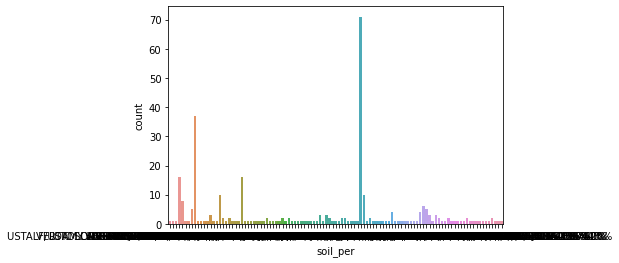

In [8]:
sns.countplot(x="soil_per",data=soil_data)

In [9]:
# soil_data.rename(columns={"SOIL TYPE PERCENT (Percent)": "soil_per"})
# sns.displot(soil_data.soil_per, color = "red")


Rain Data Preprocessing

In [10]:
rain_data.head()

,Dist Code,Year,State Code,State Name,Dist Name,JAN,FEB,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPT,OCT,NOV,DEC,ANNUAL
0,1,2005,14,Chhattisgarh,Durg,3.5,6.2,29.3,98.2,326.0,236.4,353.5,48.2,0.0,2.6,0.0,0.0,1103.9
1,1,2006,14,Chhattisgarh,Durg,0.0,0.0,26.8,18.2,44.8,27.4,251.7,392.6,120.5,4.4,0.0,0.0,886.4
2,1,2007,14,Chhattisgarh,Durg,0.0,5.8,1.8,0.0,0.0,229.6,298.4,328.8,202.1,2.0,0.0,0.0,1068.5
3,1,2008,14,Chhattisgarh,Durg,0.0,0.0,6.8,0.0,0.0,240.0,138.3,287.9,231.8,0.0,0.0,0.0,904.8
4,1,2009,14,Chhattisgarh,Durg,0.0,0.0,0.0,0.0,0.0,21.5,405.2,213.0,51.8,4.2,0.0,0.0,695.7


In [11]:

rain_data['avg_rain'] = (rain_data.JAN+rain_data.FEB+rain_data.MARCH+rain_data.APRIL + rain_data.MAY+rain_data.JUNE+rain_data.AUGUST+rain_data.SEPT+rain_data.OCT+rain_data.NOV+rain_data.DEC)/12

In [12]:
rain_data.head()

,Dist Code,Year,State Code,State Name,Dist Name,JAN,FEB,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPT,OCT,NOV,DEC,ANNUAL,avg_rain
0,1,2005,14,Chhattisgarh,Durg,3.5,6.2,29.3,98.2,326.0,236.4,353.5,48.2,0.0,2.6,0.0,0.0,1103.9,62.533333
1,1,2006,14,Chhattisgarh,Durg,0.0,0.0,26.8,18.2,44.8,27.4,251.7,392.6,120.5,4.4,0.0,0.0,886.4,52.891667
2,1,2007,14,Chhattisgarh,Durg,0.0,5.8,1.8,0.0,0.0,229.6,298.4,328.8,202.1,2.0,0.0,0.0,1068.5,64.175000
3,1,2008,14,Chhattisgarh,Durg,0.0,0.0,6.8,0.0,0.0,240.0,138.3,287.9,231.8,0.0,0.0,0.0,904.8,63.875000
4,1,2009,14,Chhattisgarh,Durg,0.0,0.0,0.0,0.0,0.0,21.5,405.2,213.0,51.8,4.2,0.0,0.0,695.7,24.208333


In [13]:
del rain_data['JAN']
del rain_data['FEB']
del rain_data['MARCH']
del rain_data['APRIL']
del rain_data['MAY']
del rain_data['JUNE']
del rain_data['JULY']
del rain_data['AUGUST']
del rain_data['SEPT']
del rain_data['OCT']
del rain_data['NOV']
del rain_data['DEC']


In [14]:
rain_data.head()

,Dist Code,Year,State Code,State Name,Dist Name,ANNUAL,avg_rain
0,1,2005,14,Chhattisgarh,Durg,1103.9,62.533333
1,1,2006,14,Chhattisgarh,Durg,886.4,52.891667
2,1,2007,14,Chhattisgarh,Durg,1068.5,64.175000
3,1,2008,14,Chhattisgarh,Durg,904.8,63.875000
4,1,2009,14,Chhattisgarh,Durg,695.7,24.208333


In [15]:
rain_data = rain_data.rename(columns={"Dist Code": "Dist_Code"})

In [16]:
rain_data = rain_data.rename(columns={"State Code": "State_Code"})
rain_data = rain_data.rename(columns={"State Name": "State_name"})
rain_data = rain_data.rename(columns={"Dist Name": "Dist_name"})
rain_data.head()

,Dist_Code,Year,State_Code,State_name,Dist_name,ANNUAL,avg_rain
0,1,2005,14,Chhattisgarh,Durg,1103.9,62.533333
1,1,2006,14,Chhattisgarh,Durg,886.4,52.891667
2,1,2007,14,Chhattisgarh,Durg,1068.5,64.175000
3,1,2008,14,Chhattisgarh,Durg,904.8,63.875000
4,1,2009,14,Chhattisgarh,Durg,695.7,24.208333


In [17]:
rain_data.to_csv('rainfall.csv')
# files.download('rainfall.csv')
fertilizer_data.head()


,Dist_Code,Year,State_Code,State_Name,Dist_Name,NITROGEN_KHARIF,Nitro_Rabi,PHOSPHATE_KHARIF,PHOSPHATE_RABI,POTASH_KHARIF,POTASH_RABI,TOTAL_KHARIF,TOTAL_RABI
0,1,2005,14,Chhattisgarh,Durg,43026,9862,15991,7921,8358,2108,67376,19891
1,1,2006,14,Chhattisgarh,Durg,55815,8163,24078,6697,9620,2772,89513,17633
2,1,2007,14,Chhattisgarh,Durg,47357,12975,21754,5804,9490,1968,78600,20746
3,1,2008,14,Chhattisgarh,Durg,42685,9721,26565,7292,14591,3011,83841,20023
4,1,2009,14,Chhattisgarh,Durg,63105,9749,37491,3708,14304,3787,114900,17244


Fertilizers Data Preprocessing

In [18]:
fertilizer_data['Nitrogen'] = (fertilizer_data.NITROGEN_KHARIF + fertilizer_data.Nitro_Rabi)
fertilizer_data['POTASH'] = (fertilizer_data.POTASH_KHARIF + fertilizer_data.POTASH_RABI)
fertilizer_data['PHOSPHATE'] = (fertilizer_data.PHOSPHATE_KHARIF + fertilizer_data.PHOSPHATE_RABI)
fertilizer_data.POTASH_RABI.head()
fertilizer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3410 entries, 0 to 3409
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Dist_Code         3410 non-null   int64 
 1   Year              3410 non-null   int64 
 2   State_Code        3410 non-null   int64 
 3   State_Name        3410 non-null   object
 4   Dist_Name         3410 non-null   object
 5   NITROGEN_KHARIF   3410 non-null   int64 
 6   Nitro_Rabi        3410 non-null   int64 
 7   PHOSPHATE_KHARIF  3410 non-null   int64 
 8   PHOSPHATE_RABI    3410 non-null   int64 
 9   POTASH_KHARIF     3410 non-null   int64 
 10  POTASH_RABI       3410 non-null   int64 
 11  TOTAL_KHARIF      3410 non-null   int64 
 12  TOTAL_RABI        3410 non-null   int64 
 13  Nitrogen          3410 non-null   int64 
 14  POTASH            3410 non-null   int64 
 15  PHOSPHATE         3410 non-null   int64 
dtypes: int64(14), object(2)
memory usage: 426.4+ KB


In [19]:
fertilizer_data.head()

,Dist_Code,Year,State_Code,State_Name,Dist_Name,NITROGEN_KHARIF,Nitro_Rabi,PHOSPHATE_KHARIF,PHOSPHATE_RABI,POTASH_KHARIF,POTASH_RABI,TOTAL_KHARIF,TOTAL_RABI,Nitrogen,POTASH,PHOSPHATE
0,1,2005,14,Chhattisgarh,Durg,43026,9862,15991,7921,8358,2108,67376,19891,52888,10466,23912
1,1,2006,14,Chhattisgarh,Durg,55815,8163,24078,6697,9620,2772,89513,17633,63978,12392,30775
2,1,2007,14,Chhattisgarh,Durg,47357,12975,21754,5804,9490,1968,78600,20746,60332,11458,27558
3,1,2008,14,Chhattisgarh,Durg,42685,9721,26565,7292,14591,3011,83841,20023,52406,17602,33857
4,1,2009,14,Chhattisgarh,Durg,63105,9749,37491,3708,14304,3787,114900,17244,72854,18091,41199


In [20]:
fertilizer_data.to_csv('fertilizer_2.csv')
# files.download('fertilizer_2.csv')
fertilizer_data.head()

,Dist_Code,Year,State_Code,State_Name,Dist_Name,NITROGEN_KHARIF,Nitro_Rabi,PHOSPHATE_KHARIF,PHOSPHATE_RABI,POTASH_KHARIF,POTASH_RABI,TOTAL_KHARIF,TOTAL_RABI,Nitrogen,POTASH,PHOSPHATE
0,1,2005,14,Chhattisgarh,Durg,43026,9862,15991,7921,8358,2108,67376,19891,52888,10466,23912
1,1,2006,14,Chhattisgarh,Durg,55815,8163,24078,6697,9620,2772,89513,17633,63978,12392,30775
2,1,2007,14,Chhattisgarh,Durg,47357,12975,21754,5804,9490,1968,78600,20746,60332,11458,27558
3,1,2008,14,Chhattisgarh,Durg,42685,9721,26565,7292,14591,3011,83841,20023,52406,17602,33857
4,1,2009,14,Chhattisgarh,Durg,63105,9749,37491,3708,14304,3787,114900,17244,72854,18091,41199


In [21]:
del fertilizer_data['NITROGEN_KHARIF']
del fertilizer_data['Nitro_Rabi']
del fertilizer_data['PHOSPHATE_KHARIF']
del fertilizer_data['PHOSPHATE_RABI']
del fertilizer_data['POTASH_KHARIF']
del fertilizer_data['POTASH_RABI']
del fertilizer_data['TOTAL_KHARIF']
del fertilizer_data['TOTAL_RABI']


In [22]:
fertilizer_data.head()

,Dist_Code,Year,State_Code,State_Name,Dist_Name,Nitrogen,POTASH,PHOSPHATE
0,1,2005,14,Chhattisgarh,Durg,52888,10466,23912
1,1,2006,14,Chhattisgarh,Durg,63978,12392,30775
2,1,2007,14,Chhattisgarh,Durg,60332,11458,27558
3,1,2008,14,Chhattisgarh,Durg,52406,17602,33857
4,1,2009,14,Chhattisgarh,Durg,72854,18091,41199


In [23]:
fertilizer_data.to_csv('fertilizer_3.csv')
# files.download('fertilizer_3.csv')
fertilizer_data.head()

,Dist_Code,Year,State_Code,State_Name,Dist_Name,Nitrogen,POTASH,PHOSPHATE
0,1,2005,14,Chhattisgarh,Durg,52888,10466,23912
1,1,2006,14,Chhattisgarh,Durg,63978,12392,30775
2,1,2007,14,Chhattisgarh,Durg,60332,11458,27558
3,1,2008,14,Chhattisgarh,Durg,52406,17602,33857
4,1,2009,14,Chhattisgarh,Durg,72854,18091,41199


Rice Data Preprocessing

In [24]:
rice_data = pd.read_csv('/content/drive/MyDrive/MlProject/Ml_Datasets/rice.csv',header=0)
rice_data.head()

,Dist_Code,Year,State_Code,State_Name,Dist_Name,Rice_Area,RICE_PRODUCTION,RICE_YIELD
0,1,2005,14,Chhattisgarh,Durg,775.99,984.31,1268.46
1,1,2006,14,Chhattisgarh,Durg,781.70,1177.10,1505.81
2,1,2007,14,Chhattisgarh,Durg,799.89,1095.84,1369.98
3,1,2008,14,Chhattisgarh,Durg,803.37,704.09,876.42
4,1,2009,14,Chhattisgarh,Durg,789.04,622.05,788.37


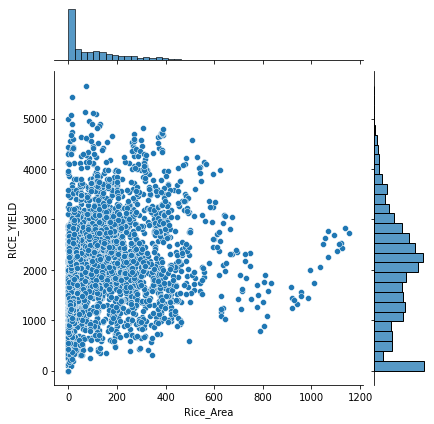

In [25]:
sns.jointplot(x="Rice_Area",y="RICE_YIELD",data=rice_data)
# rice_data.info()

In [26]:
rice_data.describe()

,Dist_Code,Year,State_Code,Rice_Area,RICE_PRODUCTION,RICE_YIELD
count,3418.000000,3418.000000,3418.000000,3418.000000,3418.000000,3418.000000
mean,270.658865,2009.996489,9.577823,135.912882,314.592949,1912.150114
std,279.026921,3.161813,4.991705,166.406645,422.620654,1100.361323
min,1.000000,2005.000000,1.000000,0.000000,0.000000,0.000000
25%,78.000000,2007.000000,6.000000,9.300000,12.475000,1137.825000
50%,156.000000,2010.000000,10.000000,79.465000,152.865000,2000.000000
75%,242.000000,2013.000000,12.000000,204.162500,448.285000,2610.107500
max,917.000000,2015.000000,20.000000,1154.230000,3215.010000,5653.830000


In [27]:
rice_data.corr()

,Dist_Code,Year,State_Code,Rice_Area,RICE_PRODUCTION,RICE_YIELD
Dist_Code,1.000000,0.000699,0.326340,0.311668,0.223461,0.047558
Year,0.000699,1.000000,0.000574,-0.001812,0.051114,0.116880
State_Code,0.326340,0.000574,1.000000,0.057893,0.039306,0.124813
Rice_Area,0.311668,-0.001812,0.057893,1.000000,0.892982,0.298858
RICE_PRODUCTION,0.223461,0.051114,0.039306,0.892982,1.000000,0.518162
RICE_YIELD,0.047558,0.116880,0.124813,0.298858,0.518162,1.000000


In [28]:
del rice_data['Rice_Area']

In [29]:
rice_data.head()

,Dist_Code,Year,State_Code,State_Name,Dist_Name,RICE_PRODUCTION,RICE_YIELD
0,1,2005,14,Chhattisgarh,Durg,984.31,1268.46
1,1,2006,14,Chhattisgarh,Durg,1177.10,1505.81
2,1,2007,14,Chhattisgarh,Durg,1095.84,1369.98
3,1,2008,14,Chhattisgarh,Durg,704.09,876.42
4,1,2009,14,Chhattisgarh,Durg,622.05,788.37


In [30]:
rice_data.info

<bound method DataFrame.info of       Dist_Code  Year  State_Code  ...  Dist_Name RICE_PRODUCTION  RICE_YIELD
0             1  2005          14  ...       Durg          984.31     1268.46
1             1  2006          14  ...       Durg         1177.10     1505.81
2             1  2007          14  ...       Durg         1095.84     1369.98
3             1  2008          14  ...       Durg          704.09      876.42
4             1  2009          14  ...       Durg          622.05      788.37
...         ...   ...         ...  ...        ...             ...         ...
3413        917  2011          15  ...  Singhbhum          485.46     1913.67
3414        917  2012          15  ...  Singhbhum          517.22     1960.28
3415        917  2013          15  ...  Singhbhum          579.70     2170.67
3416        917  2014          15  ...  Singhbhum          586.63     2288.57
3417        917  2015          15  ...  Singhbhum          264.71     1005.70

[3418 rows x 7 columns]>

In [31]:
rain_data.head(12)

,Dist_Code,Year,State_Code,State_name,Dist_name,ANNUAL,avg_rain
0,1,2005,14,Chhattisgarh,Durg,1103.9,62.533333
1,1,2006,14,Chhattisgarh,Durg,886.4,52.891667
2,1,2007,14,Chhattisgarh,Durg,1068.5,64.175000
3,1,2008,14,Chhattisgarh,Durg,904.8,63.875000
4,1,2009,14,Chhattisgarh,Durg,695.7,24.208333
5,1,2010,14,Chhattisgarh,Durg,1149.7,63.200000
6,1,2011,14,Chhattisgarh,Durg,1282.3,80.216667
7,1,2012,14,Chhattisgarh,Durg,1092.1,61.933333
8,1,2013,14,Chhattisgarh,Durg,1568.0,81.758333
9,1,2014,14,Chhattisgarh,Durg,1379.7,73.175000


In [32]:
fertilizer_data.shape

(3410, 8)

In [33]:
fertilizer_data.head(11)

,Dist_Code,Year,State_Code,State_Name,Dist_Name,Nitrogen,POTASH,PHOSPHATE
0,1,2005,14,Chhattisgarh,Durg,52888,10466,23912
1,1,2006,14,Chhattisgarh,Durg,63978,12392,30775
2,1,2007,14,Chhattisgarh,Durg,60332,11458,27558
3,1,2008,14,Chhattisgarh,Durg,52406,17602,33857
4,1,2009,14,Chhattisgarh,Durg,72854,18091,41199
5,1,2010,14,Chhattisgarh,Durg,77428,19543,45185
6,1,2011,14,Chhattisgarh,Durg,72843,17339,45815
7,1,2012,14,Chhattisgarh,Durg,93725,16214,50474
8,1,2013,14,Chhattisgarh,Durg,80745,16124,42229
9,1,2014,14,Chhattisgarh,Durg,92460,16253,54358


In [34]:
rain_data.shape

(3234, 7)

In [35]:
result = pd.concat([fertilizer_data, rain_data], axis=1)
# rain_data.merge(fertilizer_data)

In [36]:
result.head(100)

,Dist_Code,Year,State_Code,State_Name,Dist_Name,Nitrogen,POTASH,PHOSPHATE,Dist_Code,Year,State_Code,State_name,Dist_name,ANNUAL,avg_rain
0,1,2005,14,Chhattisgarh,Durg,52888,10466,23912,1.0,2005.0,14.0,Chhattisgarh,Durg,1103.9,62.533333
1,1,2006,14,Chhattisgarh,Durg,63978,12392,30775,1.0,2006.0,14.0,Chhattisgarh,Durg,886.4,52.891667
2,1,2007,14,Chhattisgarh,Durg,60332,11458,27558,1.0,2007.0,14.0,Chhattisgarh,Durg,1068.5,64.175000
3,1,2008,14,Chhattisgarh,Durg,52406,17602,33857,1.0,2008.0,14.0,Chhattisgarh,Durg,904.8,63.875000
4,1,2009,14,Chhattisgarh,Durg,72854,18091,41199,1.0,2009.0,14.0,Chhattisgarh,Durg,695.7,24.208333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,9,2012,6,Madhya Pradesh,Chhindwara,35016,3192,14165,10.0,2007.0,6.0,Madhya Pradesh,Narsinghpur,899.8,38.658333
96,9,2013,6,Madhya Pradesh,Chhindwara,41304,2149,13320,10.0,2008.0,6.0,Madhya Pradesh,Narsinghpur,947.4,59.933333
97,9,2014,6,Madhya Pradesh,Chhindwara,38309,3598,15624,10.0,2009.0,6.0,Madhya Pradesh,Narsinghpur,1163.0,67.566667
98,9,2015,6,Madhya Pradesh,Chhindwara,47316,3922,17967,10.0,2012.0,6.0,Madhya Pradesh,Narsinghpur,1039.5,52.041667


In [37]:
result.shape

(3410, 15)

Merging the preprocessed data

In [38]:
x = rain_data.merge(fertilizer_data , how='inner')

In [39]:
x.head(15)

,Dist_Code,Year,State_Code,State_name,Dist_name,ANNUAL,avg_rain,State_Name,Dist_Name,Nitrogen,POTASH,PHOSPHATE
0,1,2005,14,Chhattisgarh,Durg,1103.9,62.533333,Chhattisgarh,Durg,52888,10466,23912
1,1,2006,14,Chhattisgarh,Durg,886.4,52.891667,Chhattisgarh,Durg,63978,12392,30775
2,1,2007,14,Chhattisgarh,Durg,1068.5,64.175000,Chhattisgarh,Durg,60332,11458,27558
3,1,2008,14,Chhattisgarh,Durg,904.8,63.875000,Chhattisgarh,Durg,52406,17602,33857
4,1,2009,14,Chhattisgarh,Durg,695.7,24.208333,Chhattisgarh,Durg,72854,18091,41199
5,1,2010,14,Chhattisgarh,Durg,1149.7,63.200000,Chhattisgarh,Durg,77428,19543,45185
6,1,2011,14,Chhattisgarh,Durg,1282.3,80.216667,Chhattisgarh,Durg,72843,17339,45815
7,1,2012,14,Chhattisgarh,Durg,1092.1,61.933333,Chhattisgarh,Durg,93725,16214,50474
8,1,2013,14,Chhattisgarh,Durg,1568.0,81.758333,Chhattisgarh,Durg,80745,16124,42229
9,1,2014,14,Chhattisgarh,Durg,1379.7,73.175000,Chhattisgarh,Durg,92460,16253,54358


In [40]:
x.shape

(3210, 12)

In [41]:
# del X['State_name']
# del x['State_Name']
# del x['Dist_Name']
# del x['ANNUAL']

In [42]:
x.head()

,Dist_Code,Year,State_Code,State_name,Dist_name,ANNUAL,avg_rain,State_Name,Dist_Name,Nitrogen,POTASH,PHOSPHATE
0,1,2005,14,Chhattisgarh,Durg,1103.9,62.533333,Chhattisgarh,Durg,52888,10466,23912
1,1,2006,14,Chhattisgarh,Durg,886.4,52.891667,Chhattisgarh,Durg,63978,12392,30775
2,1,2007,14,Chhattisgarh,Durg,1068.5,64.175000,Chhattisgarh,Durg,60332,11458,27558
3,1,2008,14,Chhattisgarh,Durg,904.8,63.875000,Chhattisgarh,Durg,52406,17602,33857
4,1,2009,14,Chhattisgarh,Durg,695.7,24.208333,Chhattisgarh,Durg,72854,18091,41199


In [43]:
x.corr()

,Dist_Code,Year,State_Code,ANNUAL,avg_rain,Nitrogen,POTASH,PHOSPHATE
Dist_Code,1.000000,0.004569,0.318217,0.363302,0.394192,-0.179264,0.000137,-0.237047
Year,0.004569,1.000000,0.002756,-0.045530,-0.034605,0.105936,-0.040466,0.064803
State_Code,0.318217,0.002756,1.000000,0.225696,0.255157,-0.257551,-0.131174,-0.286279
ANNUAL,0.363302,-0.045530,0.225696,1.000000,0.963574,-0.312631,0.066641,-0.270786
avg_rain,0.394192,-0.034605,0.255157,0.963574,1.000000,-0.283898,0.117059,-0.242766
Nitrogen,-0.179264,0.105936,-0.257551,-0.312631,-0.283898,1.000000,0.418269,0.846688
POTASH,0.000137,-0.040466,-0.131174,0.066641,0.117059,0.418269,1.000000,0.649362
PHOSPHATE,-0.237047,0.064803,-0.286279,-0.270786,-0.242766,0.846688,0.649362,1.000000


In [44]:
x.shape

(3210, 12)

In [45]:
rice_data.shape

(3418, 7)

In [46]:
wheat_data.shape

(3418, 8)

Soil data Preprocessing(2nd part, 1st in Soil_Preprocess.ipynb)

In [47]:
soil_data2 = pd.read_csv('/content/drive/MyDrive/MlProject/Ml_Datasets/Soil_Conv_Final.csv',header=0)
soil_data2.head

<bound method NDFrame.head of      Dist_Code  State_ Code    State_name  ... USTALFS  VERTIC_SOILS  VERTISOLS
0            1           14  Chhattisgarh  ...     NaN           NaN        NaN
1            2           14  Chhattisgarh  ...     NaN           NaN        NaN
2            3           14  Chhattisgarh  ...     NaN           NaN        15%
3            4           14  Chhattisgarh  ...     NaN           NaN        NaN
4            5           14  Chhattisgarh  ...     NaN           NaN        NaN
..         ...          ...           ...  ...     ...           ...        ...
308        914           15     Jharkhand  ...     NaN           NaN        NaN
309        915           15     Jharkhand  ...     NaN           NaN        NaN
310        916           15     Jharkhand  ...     NaN           NaN        NaN
311        917           15     Jharkhand  ...     NaN           NaN        NaN
312        999           11    Tamil Nadu  ...     NaN           NaN        NaN

[313 rows

In [48]:
# df['DataFrame Column'] = df['DataFrame Column'].replace(np.nan, 0)
# soil_data2 = soil_data2.fillna('0%')
soil_data2 = soil_data2.replace(np.nan, '0%', regex=True)
# soil_data2.fillna(0)
# soil_data2.replace(np.nan,0)
soil_data2.head(100)

,Dist_Code,State_ Code,State_name,Dist_name,DYSTROPEPTS,FLUVENTS,INCEPTISOLS,LOAMY_ALFISOL,ORTHENTS,ORTHIDS,PSAMMENTS,SANDY_ALFISOL,UDALFS,UDOLLS_UDALFS,UDUPTS_UDALFS,USTALF_USTOLLS,USTALFS,VERTIC_SOILS,VERTISOLS
0,1,14,Chhattisgarh,Durg,0%,0%,0%,60%,0%,0%,0%,0%,0%,0%,0%,40%,0%,0%,0%
1,2,14,Chhattisgarh,Bastar,0%,0%,0%,100%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
2,3,14,Chhattisgarh,Raipur,0%,0%,0%,25%,0%,0%,0%,0%,0%,0%,0%,50%,0%,0%,15%
3,4,14,Chhattisgarh,Bilaspur,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,100%,0%,0%,0%
4,5,14,Chhattisgarh,Raigarh,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,100%,0%,0%,0%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,7,Maharashtra,Thane,0%,0%,0%,0%,0%,45%,0%,0%,0%,0%,0%,0%,0%,55%,0%
96,97,7,Maharashtra,Raigad,0%,0%,0%,0%,0%,35%,0%,0%,0%,0%,20%,0%,0%,45%,0%
97,98,7,Maharashtra,Ratnagiri,0%,0%,0%,0%,0%,50%,0%,0%,0%,0%,50%,0%,0%,0%,0%
98,99,7,Maharashtra,Nasik,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,85%,15%


In [49]:
soil_data2['DYSTROPEPTS'] = list(map(lambda x: x[:-1], soil_data2['DYSTROPEPTS'].values))
soil_data2['DYSTROPEPTS'] = [float(x) for x in soil_data2['DYSTROPEPTS'].values]
soil_data2['DYSTROPEPTS'] = list(map(lambda x: x/100, soil_data2['DYSTROPEPTS'].values))

soil_data2['LOAMY_ALFISOL'] = list(map(lambda x: x[:-1], soil_data2['LOAMY_ALFISOL'].values))
soil_data2['LOAMY_ALFISOL'] = [float(x) for x in soil_data2['LOAMY_ALFISOL'].values]
soil_data2['LOAMY_ALFISOL'] = list(map(lambda x: x/100, soil_data2['LOAMY_ALFISOL'].values))

soil_data2['FLUVENTS'] = list(map(lambda x: x[:-1], soil_data2['FLUVENTS'].values))
soil_data2['FLUVENTS'] = [float(x) for x in soil_data2['FLUVENTS'].values]
soil_data2['FLUVENTS'] = list(map(lambda x: x/100, soil_data2['FLUVENTS'].values))

soil_data2['INCEPTISOLS'] = list(map(lambda x: x[:-1], soil_data2['INCEPTISOLS'].values))
soil_data2['INCEPTISOLS'] = [float(x) for x in soil_data2['INCEPTISOLS'].values]
soil_data2['INCEPTISOLS'] = list(map(lambda x: x/100, soil_data2['INCEPTISOLS'].values))

soil_data2['ORTHENTS'] = list(map(lambda x: x[:-1], soil_data2['ORTHENTS'].values))
soil_data2['ORTHENTS'] = [float(x) for x in soil_data2['ORTHENTS'].values]
soil_data2['ORTHENTS'] = list(map(lambda x: x/100, soil_data2['ORTHENTS'].values))

soil_data2['ORTHIDS'] = list(map(lambda x: x[:-1], soil_data2['ORTHIDS'].values))
soil_data2['ORTHIDS'] = [float(x) for x in soil_data2['ORTHIDS'].values]
soil_data2['ORTHIDS'] = list(map(lambda x: x/100, soil_data2['ORTHIDS'].values))

soil_data2['PSAMMENTS'] = list(map(lambda x: x[:-1], soil_data2['PSAMMENTS'].values))
soil_data2['PSAMMENTS'] = [float(x) for x in soil_data2['PSAMMENTS'].values]
soil_data2['PSAMMENTS'] = list(map(lambda x: x/100, soil_data2['PSAMMENTS'].values))

soil_data2['SANDY_ALFISOL'] = list(map(lambda x: x[:-1], soil_data2['SANDY_ALFISOL'].values))
soil_data2['SANDY_ALFISOL'] = [float(x) for x in soil_data2['SANDY_ALFISOL'].values]
soil_data2['SANDY_ALFISOL'] = list(map(lambda x: x/100, soil_data2['SANDY_ALFISOL'].values))

soil_data2['UDALFS'] = list(map(lambda x: x[:-1], soil_data2['UDALFS'].values))
soil_data2['UDALFS'] = [float(x) for x in soil_data2['UDALFS'].values]
soil_data2['UDALFS'] = list(map(lambda x: x/100, soil_data2['UDALFS'].values))

soil_data2['UDOLLS_UDALFS'] = list(map(lambda x: x[:-1], soil_data2['UDOLLS_UDALFS'].values))
soil_data2['UDOLLS_UDALFS'] = [float(x) for x in soil_data2['UDOLLS_UDALFS'].values]
soil_data2['UDOLLS_UDALFS'] = list(map(lambda x: x/100, soil_data2['UDOLLS_UDALFS'].values))

soil_data2['UDUPTS_UDALFS'] = list(map(lambda x: x[:-1], soil_data2['UDUPTS_UDALFS'].values))
soil_data2['UDUPTS_UDALFS'] = [float(x) for x in soil_data2['UDUPTS_UDALFS'].values]
soil_data2['UDUPTS_UDALFS'] = list(map(lambda x: x/100, soil_data2['UDUPTS_UDALFS'].values))

soil_data2['USTALF_USTOLLS'] = list(map(lambda x: x[:-1], soil_data2['USTALF_USTOLLS'].values))
soil_data2['USTALF_USTOLLS'] = [float(x) for x in soil_data2['USTALF_USTOLLS'].values]
soil_data2['USTALF_USTOLLS'] = list(map(lambda x: x/100, soil_data2['USTALF_USTOLLS'].values))

soil_data2['USTALFS'] = list(map(lambda x: x[:-1], soil_data2['USTALFS'].values))
soil_data2['USTALFS'] = [float(x) for x in soil_data2['USTALFS'].values]
soil_data2['USTALFS'] = list(map(lambda x: x/100, soil_data2['USTALFS'].values))

soil_data2['VERTIC_SOILS'] = list(map(lambda x: x[:-1], soil_data2['VERTIC_SOILS'].values))
soil_data2['VERTIC_SOILS'] = [float(x) for x in soil_data2['VERTIC_SOILS'].values]
soil_data2['VERTIC_SOILS'] = list(map(lambda x: x/100, soil_data2['VERTIC_SOILS'].values))

soil_data2['VERTISOLS'] = list(map(lambda x: x[:-1], soil_data2['VERTISOLS'].values))
soil_data2['VERTISOLS'] = [float(x) for x in soil_data2['VERTISOLS'].values]
soil_data2['VERTISOLS'] = list(map(lambda x: x/100, soil_data2['VERTISOLS'].values))

In [50]:
soil_data2.shape

(313, 19)

In [51]:
z = x.merge(soil_data2,how='inner')

In [52]:
y = z.merge(rice_data,how='inner')

In [53]:
y

,Dist_Code,Year,State_Code,State_name,Dist_name,ANNUAL,avg_rain,State_Name,Dist_Name,Nitrogen,POTASH,PHOSPHATE,State_ Code,DYSTROPEPTS,FLUVENTS,INCEPTISOLS,LOAMY_ALFISOL,ORTHENTS,ORTHIDS,PSAMMENTS,SANDY_ALFISOL,UDALFS,UDOLLS_UDALFS,UDUPTS_UDALFS,USTALF_USTOLLS,USTALFS,VERTIC_SOILS,VERTISOLS,RICE_PRODUCTION,RICE_YIELD
0,1,2005,14,Chhattisgarh,Durg,1103.9,62.533333,Chhattisgarh,Durg,52888,10466,23912,14,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,984.31,1268.46
1,1,2006,14,Chhattisgarh,Durg,886.4,52.891667,Chhattisgarh,Durg,63978,12392,30775,14,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,1177.10,1505.81
2,1,2007,14,Chhattisgarh,Durg,1068.5,64.175000,Chhattisgarh,Durg,60332,11458,27558,14,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,1095.84,1369.98
3,1,2008,14,Chhattisgarh,Durg,904.8,63.875000,Chhattisgarh,Durg,52406,17602,33857,14,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,704.09,876.42
4,1,2009,14,Chhattisgarh,Durg,695.7,24.208333,Chhattisgarh,Durg,72854,18091,41199,14,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,622.05,788.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3205,917,2011,15,Jharkhand,Singhbhum,1578.1,113.875000,Jharkhand,Singhbhum,2144,124,513,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,485.46,1913.67
3206,917,2012,15,Jharkhand,Singhbhum,1176.5,73.741667,Jharkhand,Singhbhum,3763,47,304,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,517.22,1960.28
3207,917,2013,15,Jharkhand,Singhbhum,1626.4,111.600000,Jharkhand,Singhbhum,3796,43,392,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,579.70,2170.67
3208,917,2014,15,Jharkhand,Singhbhum,1431.2,88.866667,Jharkhand,Singhbhum,2925,14,327,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,586.63,2288.57


In [54]:
del y['State_Name']
del y['Dist_Name']

In [55]:
wheat_data.head()

,Dist_Code,Year,State_Code,State_name,Dist_name,WHEAT_AREA (1000 ha),WHEAT_PRODUCTION (1000 tons),WHEAT_YIELD (Kg per ha)
0,1,2005,14,Chhattisgarh,Durg,36.43,23.19,636.48
1,1,2006,14,Chhattisgarh,Durg,36.81,26.62,723.16
2,1,2007,14,Chhattisgarh,Durg,37.32,34.38,921.03
3,1,2008,14,Chhattisgarh,Durg,36.46,31.19,855.47
4,1,2009,14,Chhattisgarh,Durg,42.44,38.12,898.09


In [56]:
y = y.merge(wheat_data,how='inner')

In [57]:
y.head()

,Dist_Code,Year,State_Code,State_name,Dist_name,ANNUAL,avg_rain,Nitrogen,POTASH,PHOSPHATE,State_ Code,DYSTROPEPTS,FLUVENTS,INCEPTISOLS,LOAMY_ALFISOL,ORTHENTS,ORTHIDS,PSAMMENTS,SANDY_ALFISOL,UDALFS,UDOLLS_UDALFS,UDUPTS_UDALFS,USTALF_USTOLLS,USTALFS,VERTIC_SOILS,VERTISOLS,RICE_PRODUCTION,RICE_YIELD,WHEAT_AREA (1000 ha),WHEAT_PRODUCTION (1000 tons),WHEAT_YIELD (Kg per ha)
0,1,2005,14,Chhattisgarh,Durg,1103.9,62.533333,52888,10466,23912,14,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,984.31,1268.46,36.43,23.19,636.48
1,1,2006,14,Chhattisgarh,Durg,886.4,52.891667,63978,12392,30775,14,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,1177.10,1505.81,36.81,26.62,723.16
2,1,2007,14,Chhattisgarh,Durg,1068.5,64.175000,60332,11458,27558,14,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,1095.84,1369.98,37.32,34.38,921.03
3,1,2008,14,Chhattisgarh,Durg,904.8,63.875000,52406,17602,33857,14,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,704.09,876.42,36.46,31.19,855.47
4,1,2009,14,Chhattisgarh,Durg,695.7,24.208333,72854,18091,41199,14,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,622.05,788.37,42.44,38.12,898.09


In [58]:
y.shape

(3210, 31)

In [59]:
y.corr()

,Dist_Code,Year,State_Code,ANNUAL,avg_rain,Nitrogen,POTASH,PHOSPHATE,State_ Code,DYSTROPEPTS,FLUVENTS,INCEPTISOLS,LOAMY_ALFISOL,ORTHENTS,ORTHIDS,PSAMMENTS,SANDY_ALFISOL,UDALFS,UDOLLS_UDALFS,UDUPTS_UDALFS,USTALF_USTOLLS,USTALFS,VERTIC_SOILS,VERTISOLS,RICE_PRODUCTION,RICE_YIELD,WHEAT_AREA (1000 ha),WHEAT_PRODUCTION (1000 tons),WHEAT_YIELD (Kg per ha)
Dist_Code,1.000000,0.004569,0.318217,0.363302,0.394192,-0.179264,0.000137,-0.237047,0.318217,NaN,NaN,0.086514,0.135230,NaN,0.018045,-0.106949,-0.237173,NaN,-0.026640,0.148607,0.289098,NaN,-0.423266,-0.245054,0.199628,0.026989,-0.147884,-0.141893,-0.057734
Year,0.004569,1.000000,0.002756,-0.045530,-0.034605,0.105936,-0.040466,0.064803,0.002756,NaN,NaN,0.006042,0.000175,NaN,0.011003,0.000212,0.005403,NaN,0.000135,-0.000919,-0.000962,NaN,-0.013292,-0.006804,0.056148,0.129992,0.036659,0.056321,0.080582
State_Code,0.318217,0.002756,1.000000,0.225696,0.255157,-0.257551,-0.131174,-0.286279,1.000000,NaN,NaN,0.050375,-0.028081,NaN,-0.165829,-0.025736,-0.119263,NaN,0.171238,0.021434,-0.021523,NaN,-0.319131,-0.160827,0.021093,0.101090,-0.158404,-0.131545,-0.139778
ANNUAL,0.363302,-0.045530,0.225696,1.000000,0.963574,-0.312631,0.066641,-0.270786,0.225696,NaN,NaN,-0.212353,0.096470,NaN,0.102665,-0.230349,-0.019330,NaN,0.020972,0.207565,0.039588,NaN,-0.099618,-0.064419,0.049008,0.087282,-0.359222,-0.323661,-0.398855
avg_rain,0.394192,-0.034605,0.255157,0.963574,1.000000,-0.283898,0.117059,-0.242766,0.255157,NaN,NaN,-0.213328,0.097071,NaN,0.128125,-0.224598,0.043207,NaN,0.007414,0.178279,0.026292,NaN,-0.168030,-0.082566,0.082848,0.141357,-0.376346,-0.329046,-0.441386
Nitrogen,-0.179264,0.105936,-0.257551,-0.312631,-0.283898,1.000000,0.418269,0.846688,-0.257551,NaN,NaN,0.246900,-0.068193,NaN,0.078276,0.102924,0.051073,NaN,-0.100495,-0.025815,-0.074845,NaN,-0.092570,0.111859,0.553861,0.431259,0.600297,0.658174,0.349197
POTASH,0.000137,-0.040466,-0.131174,0.066641,0.117059,0.418269,1.000000,0.649362,-0.131174,NaN,NaN,-0.203863,-0.008628,NaN,0.312877,-0.149014,0.318263,NaN,-0.099894,0.164544,-0.088726,NaN,-0.037863,0.272052,0.413290,0.278634,-0.222686,-0.185901,-0.296557
PHOSPHATE,-0.237047,0.064803,-0.286279,-0.270786,-0.242766,0.846688,0.649362,1.000000,-0.286279,NaN,NaN,0.028013,-0.043769,NaN,0.157570,0.024153,0.149520,NaN,-0.118280,0.040795,-0.109483,NaN,0.055303,0.248703,0.489014,0.324106,0.337578,0.387831,0.156504
State_ Code,0.318217,0.002756,1.000000,0.225696,0.255157,-0.257551,-0.131174,-0.286279,1.000000,NaN,NaN,0.050375,-0.028081,NaN,-0.165829,-0.025736,-0.119263,NaN,0.171238,0.021434,-0.021523,NaN,-0.319131,-0.160827,0.021093,0.101090,-0.158404,-0.131545,-0.139778
DYSTROPEPTS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
del y["WHEAT_AREA (1000 ha)"]

In [61]:
y.head()

,Dist_Code,Year,State_Code,State_name,Dist_name,ANNUAL,avg_rain,Nitrogen,POTASH,PHOSPHATE,State_ Code,DYSTROPEPTS,FLUVENTS,INCEPTISOLS,LOAMY_ALFISOL,ORTHENTS,ORTHIDS,PSAMMENTS,SANDY_ALFISOL,UDALFS,UDOLLS_UDALFS,UDUPTS_UDALFS,USTALF_USTOLLS,USTALFS,VERTIC_SOILS,VERTISOLS,RICE_PRODUCTION,RICE_YIELD,WHEAT_PRODUCTION (1000 tons),WHEAT_YIELD (Kg per ha)
0,1,2005,14,Chhattisgarh,Durg,1103.9,62.533333,52888,10466,23912,14,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,984.31,1268.46,23.19,636.48
1,1,2006,14,Chhattisgarh,Durg,886.4,52.891667,63978,12392,30775,14,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,1177.10,1505.81,26.62,723.16
2,1,2007,14,Chhattisgarh,Durg,1068.5,64.175000,60332,11458,27558,14,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,1095.84,1369.98,34.38,921.03
3,1,2008,14,Chhattisgarh,Durg,904.8,63.875000,52406,17602,33857,14,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,704.09,876.42,31.19,855.47
4,1,2009,14,Chhattisgarh,Durg,695.7,24.208333,72854,18091,41199,14,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,622.05,788.37,38.12,898.09


In [62]:
maize_data = pd.read_csv('/content/drive/MyDrive/MlProject/Ml_Datasets/maize.csv',header=0)

In [63]:
y = y.merge(maize_data,how='inner')

In [64]:
y

,Dist_Code,Year,State_Code,State_name,Dist_name,ANNUAL,avg_rain,Nitrogen,POTASH,PHOSPHATE,State_ Code,DYSTROPEPTS,FLUVENTS,INCEPTISOLS,LOAMY_ALFISOL,ORTHENTS,ORTHIDS,PSAMMENTS,SANDY_ALFISOL,UDALFS,UDOLLS_UDALFS,UDUPTS_UDALFS,USTALF_USTOLLS,USTALFS,VERTIC_SOILS,VERTISOLS,RICE_PRODUCTION,RICE_YIELD,WHEAT_PRODUCTION (1000 tons),WHEAT_YIELD (Kg per ha),MAIZE_AREA(1000ha),MAIZE_PRODUCTION(1000tons),MAIZE_YIELD(KgPerHa)
0,1,2005,14,Chhattisgarh,Durg,1103.9,62.533333,52888,10466,23912,14,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,984.31,1268.46,23.19,636.48,3.26,3.87,1186.04
1,1,2006,14,Chhattisgarh,Durg,886.4,52.891667,63978,12392,30775,14,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,1177.10,1505.81,26.62,723.16,5.28,5.03,953.14
2,1,2007,14,Chhattisgarh,Durg,1068.5,64.175000,60332,11458,27558,14,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,1095.84,1369.98,34.38,921.03,3.30,3.82,1157.23
3,1,2008,14,Chhattisgarh,Durg,904.8,63.875000,52406,17602,33857,14,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,704.09,876.42,31.19,855.47,3.40,3.35,984.92
4,1,2009,14,Chhattisgarh,Durg,695.7,24.208333,72854,18091,41199,14,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,622.05,788.37,38.12,898.09,3.25,3.40,1045.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3205,917,2011,15,Jharkhand,Singhbhum,1578.1,113.875000,2144,124,513,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,485.46,1913.67,0.83,1169.01,1.94,1.60,824.74
3206,917,2012,15,Jharkhand,Singhbhum,1176.5,73.741667,3763,47,304,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,517.22,1960.28,1.63,1236.36,2.17,2.26,1041.47
3207,917,2013,15,Jharkhand,Singhbhum,1626.4,111.600000,3796,43,392,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,579.70,2170.67,1.85,1209.15,2.53,3.74,1478.26
3208,917,2014,15,Jharkhand,Singhbhum,1431.2,88.866667,2925,14,327,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,586.63,2288.57,6.65,1240.67,2.30,3.33,1447.83


In [65]:
y.corr()

,Dist_Code,Year,State_Code,ANNUAL,avg_rain,Nitrogen,POTASH,PHOSPHATE,State_ Code,DYSTROPEPTS,FLUVENTS,INCEPTISOLS,LOAMY_ALFISOL,ORTHENTS,ORTHIDS,PSAMMENTS,SANDY_ALFISOL,UDALFS,UDOLLS_UDALFS,UDUPTS_UDALFS,USTALF_USTOLLS,USTALFS,VERTIC_SOILS,VERTISOLS,RICE_PRODUCTION,RICE_YIELD,WHEAT_PRODUCTION (1000 tons),WHEAT_YIELD (Kg per ha),MAIZE_AREA(1000ha),MAIZE_PRODUCTION(1000tons),MAIZE_YIELD(KgPerHa)
Dist_Code,1.000000,0.004569,0.318217,0.363302,0.394192,-0.179264,0.000137,-0.237047,0.318217,NaN,NaN,0.086514,0.135230,NaN,0.018045,-0.106949,-0.237173,NaN,-0.026640,0.148607,0.289098,NaN,-0.423266,-0.245054,0.199628,0.026989,-0.141893,-0.057734,-0.098228,-0.083484,-0.077661
Year,0.004569,1.000000,0.002756,-0.045530,-0.034605,0.105936,-0.040466,0.064803,0.002756,NaN,NaN,0.006042,0.000175,NaN,0.011003,0.000212,0.005403,NaN,0.000135,-0.000919,-0.000962,NaN,-0.013292,-0.006804,0.056148,0.129992,0.056321,0.080582,0.034214,0.087605,0.138578
State_Code,0.318217,0.002756,1.000000,0.225696,0.255157,-0.257551,-0.131174,-0.286279,1.000000,NaN,NaN,0.050375,-0.028081,NaN,-0.165829,-0.025736,-0.119263,NaN,0.171238,0.021434,-0.021523,NaN,-0.319131,-0.160827,0.021093,0.101090,-0.131545,-0.139778,-0.126368,-0.134624,-0.198141
ANNUAL,0.363302,-0.045530,0.225696,1.000000,0.963574,-0.312631,0.066641,-0.270786,0.225696,NaN,NaN,-0.212353,0.096470,NaN,0.102665,-0.230349,-0.019330,NaN,0.020972,0.207565,0.039588,NaN,-0.099618,-0.064419,0.049008,0.087282,-0.323661,-0.398855,-0.129922,-0.098972,-0.034534
avg_rain,0.394192,-0.034605,0.255157,0.963574,1.000000,-0.283898,0.117059,-0.242766,0.255157,NaN,NaN,-0.213328,0.097071,NaN,0.128125,-0.224598,0.043207,NaN,0.007414,0.178279,0.026292,NaN,-0.168030,-0.082566,0.082848,0.141357,-0.329046,-0.441386,-0.124882,-0.074244,0.018326
Nitrogen,-0.179264,0.105936,-0.257551,-0.312631,-0.283898,1.000000,0.418269,0.846688,-0.257551,NaN,NaN,0.246900,-0.068193,NaN,0.078276,0.102924,0.051073,NaN,-0.100495,-0.025815,-0.074845,NaN,-0.092570,0.111859,0.553861,0.431259,0.658174,0.349197,0.134615,0.255336,0.269589
POTASH,0.000137,-0.040466,-0.131174,0.066641,0.117059,0.418269,1.000000,0.649362,-0.131174,NaN,NaN,-0.203863,-0.008628,NaN,0.312877,-0.149014,0.318263,NaN,-0.099894,0.164544,-0.088726,NaN,-0.037863,0.272052,0.413290,0.278634,-0.185901,-0.296557,0.207915,0.356866,0.429491
PHOSPHATE,-0.237047,0.064803,-0.286279,-0.270786,-0.242766,0.846688,0.649362,1.000000,-0.286279,NaN,NaN,0.028013,-0.043769,NaN,0.157570,0.024153,0.149520,NaN,-0.118280,0.040795,-0.109483,NaN,0.055303,0.248703,0.489014,0.324106,0.387831,0.156504,0.182980,0.323522,0.334214
State_ Code,0.318217,0.002756,1.000000,0.225696,0.255157,-0.257551,-0.131174,-0.286279,1.000000,NaN,NaN,0.050375,-0.028081,NaN,-0.165829,-0.025736,-0.119263,NaN,0.171238,0.021434,-0.021523,NaN,-0.319131,-0.160827,0.021093,0.101090,-0.131545,-0.139778,-0.126368,-0.134624,-0.198141
DYSTROPEPTS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
del y["MAIZE_AREA(1000ha)"]

In [67]:
y.head(20)

,Dist_Code,Year,State_Code,State_name,Dist_name,ANNUAL,avg_rain,Nitrogen,POTASH,PHOSPHATE,State_ Code,DYSTROPEPTS,FLUVENTS,INCEPTISOLS,LOAMY_ALFISOL,ORTHENTS,ORTHIDS,PSAMMENTS,SANDY_ALFISOL,UDALFS,UDOLLS_UDALFS,UDUPTS_UDALFS,USTALF_USTOLLS,USTALFS,VERTIC_SOILS,VERTISOLS,RICE_PRODUCTION,RICE_YIELD,WHEAT_PRODUCTION (1000 tons),WHEAT_YIELD (Kg per ha),MAIZE_PRODUCTION(1000tons),MAIZE_YIELD(KgPerHa)
0,1,2005,14,Chhattisgarh,Durg,1103.9,62.533333,52888,10466,23912,14,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,984.31,1268.46,23.19,636.48,3.87,1186.04
1,1,2006,14,Chhattisgarh,Durg,886.4,52.891667,63978,12392,30775,14,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,1177.10,1505.81,26.62,723.16,5.03,953.14
2,1,2007,14,Chhattisgarh,Durg,1068.5,64.175000,60332,11458,27558,14,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,1095.84,1369.98,34.38,921.03,3.82,1157.23
3,1,2008,14,Chhattisgarh,Durg,904.8,63.875000,52406,17602,33857,14,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,704.09,876.42,31.19,855.47,3.35,984.92
4,1,2009,14,Chhattisgarh,Durg,695.7,24.208333,72854,18091,41199,14,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,622.05,788.37,38.12,898.09,3.40,1045.97
5,1,2010,14,Chhattisgarh,Durg,1149.7,63.200000,77428,19543,45185,14,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,1319.18,1695.77,45.87,994.69,4.63,1457.32
6,1,2011,14,Chhattisgarh,Durg,1282.3,80.216667,72843,17339,45815,14,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,1416.48,1756.23,50.19,1115.68,4.67,1285.56
7,1,2012,14,Chhattisgarh,Durg,1092.1,61.933333,93725,16214,50474,14,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,1534.22,1900.97,47.69,1087.10,4.80,1538.56
8,1,2013,14,Chhattisgarh,Durg,1568.0,81.758333,80745,16124,42229,14,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,1296.24,1581.86,43.33,1043.06,6.34,1742.20
9,1,2014,14,Chhattisgarh,Durg,1379.7,73.175000,92460,16253,54358,14,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,1444.24,1729.89,50.96,1151.49,5.84,1451.66


In [68]:
# y.to_csv('DataV1.csv')
# files.download('DataV1.csv')

In [69]:
y.shape

(3210, 32)

In [70]:
y.head(100)

,Dist_Code,Year,State_Code,State_name,Dist_name,ANNUAL,avg_rain,Nitrogen,POTASH,PHOSPHATE,State_ Code,DYSTROPEPTS,FLUVENTS,INCEPTISOLS,LOAMY_ALFISOL,ORTHENTS,ORTHIDS,PSAMMENTS,SANDY_ALFISOL,UDALFS,UDOLLS_UDALFS,UDUPTS_UDALFS,USTALF_USTOLLS,USTALFS,VERTIC_SOILS,VERTISOLS,RICE_PRODUCTION,RICE_YIELD,WHEAT_PRODUCTION (1000 tons),WHEAT_YIELD (Kg per ha),MAIZE_PRODUCTION(1000tons),MAIZE_YIELD(KgPerHa)
0,1,2005,14,Chhattisgarh,Durg,1103.9,62.533333,52888,10466,23912,14,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,984.31,1268.46,23.19,636.48,3.87,1186.04
1,1,2006,14,Chhattisgarh,Durg,886.4,52.891667,63978,12392,30775,14,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,1177.10,1505.81,26.62,723.16,5.03,953.14
2,1,2007,14,Chhattisgarh,Durg,1068.5,64.175000,60332,11458,27558,14,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,1095.84,1369.98,34.38,921.03,3.82,1157.23
3,1,2008,14,Chhattisgarh,Durg,904.8,63.875000,52406,17602,33857,14,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,704.09,876.42,31.19,855.47,3.35,984.92
4,1,2009,14,Chhattisgarh,Durg,695.7,24.208333,72854,18091,41199,14,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,622.05,788.37,38.12,898.09,3.40,1045.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,10,2007,6,Madhya Pradesh,Narsinghpur,899.8,38.658333,10666,848,4863,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.8,8.38,649.61,157.50,2863.64,0.90,1500.00
96,10,2008,6,Madhya Pradesh,Narsinghpur,947.4,59.933333,11719,1699,7238,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.8,8.05,614.50,189.70,3044.94,0.90,1800.00
97,10,2009,6,Madhya Pradesh,Narsinghpur,1163.0,67.566667,13128,2185,7769,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.8,14.90,1111.94,169.40,2602.15,0.80,1333.33
98,10,2012,6,Madhya Pradesh,Narsinghpur,1039.5,52.041667,19500,846,12182,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.8,17.21,1333.08,240.82,2936.83,2.50,2808.99


In [71]:
# z.to_csv('Dataset_V2.csv')
# files.download('Dataset_V2.csv')
del y["State_ Code"]

In [72]:
y.shape

(3210, 31)

In [73]:
y.to_csv('Dataset_V3.csv')
files.download('Dataset_V3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [74]:
rdf = y

In [75]:
del rdf["WHEAT_PRODUCTION (1000 tons)"]
del rdf["MAIZE_PRODUCTION(1000tons)"]	
del rdf["MAIZE_YIELD(KgPerHa)"]
del rdf["WHEAT_YIELD (Kg per ha)"]	

In [76]:
rdf.head()
rdf.shape

(3210, 27)

Downloading the data

In [77]:
rdf.to_csv('rdf.csv')
files.download('rdf.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>